In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df['rating'].describe()

count      8803
unique       17
top       TV-MA
freq       3207
Name: rating, dtype: object

In [10]:
df_filtrado = df.fillna('Não informado')

In [11]:
df_filtrado['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [12]:
df_filtrado['type'].value_counts(normalize=True) * 100

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [13]:
df_filtrado['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1961       1
1925       1
1959       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64

In [14]:
df_filtrado['country'].value_counts()

country
United States                                             2818
India                                                      972
Não informado                                              831
United Kingdom                                             419
Japan                                                      245
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64

In [15]:
df_filtrado['listed_in'].value_counts()

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedies, Music & Musicals        1
Classic Movies, Horror Movies, Thrillers              1
Children & Family Movies, Classic Movies, Dramas      1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 514, dtype: int64

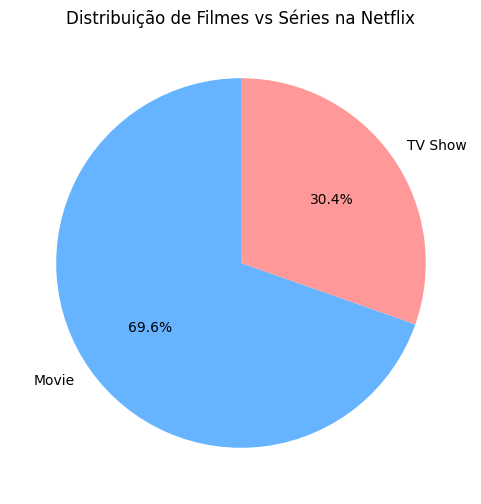

In [16]:
tipos = df_filtrado['type'].value_counts()
labels = tipos.index
sizes = tipos.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Distribuição de Filmes vs Séries na Netflix")
plt.show()

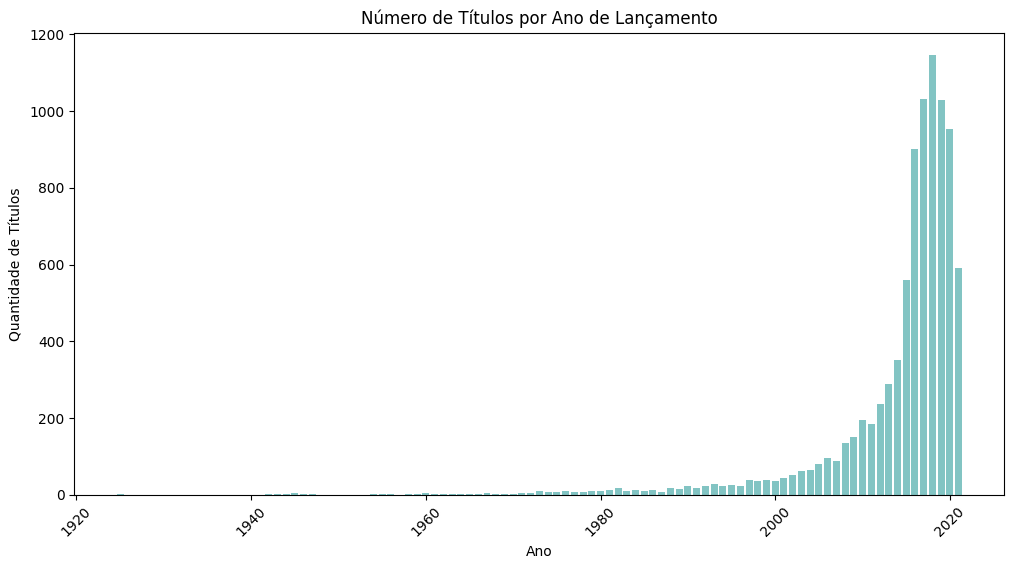

In [17]:
# Contagem por ano de lançamento
anos = df_filtrado['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(anos.index, anos.values, color='#82c4c3')
plt.title("Número de Títulos por Ano de Lançamento")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Títulos")
plt.xticks(rotation=45)
plt.show()


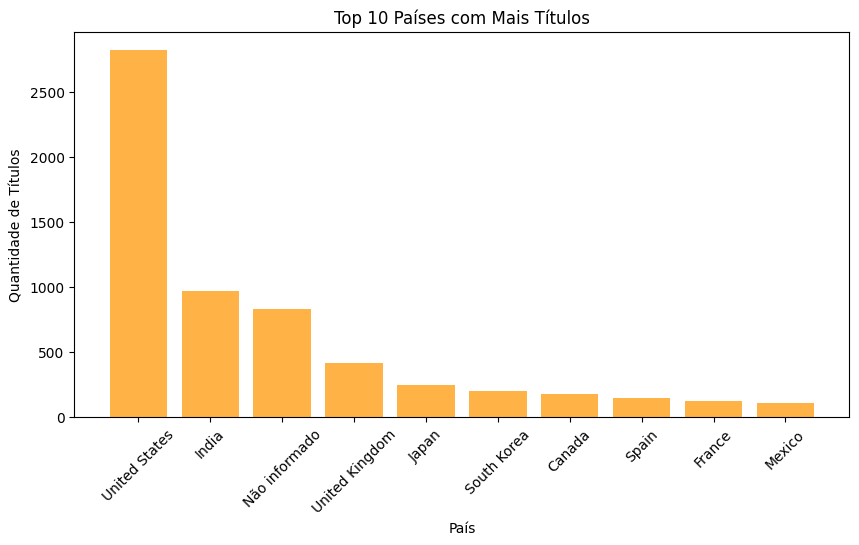

In [18]:
# Contagem por país
top_paises = df_filtrado['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top_paises.index, top_paises.values, color='#ffb347')
plt.title("Top 10 Países com Mais Títulos")
plt.xlabel("País")
plt.ylabel("Quantidade de Títulos")
plt.xticks(rotation=45)
plt.show()


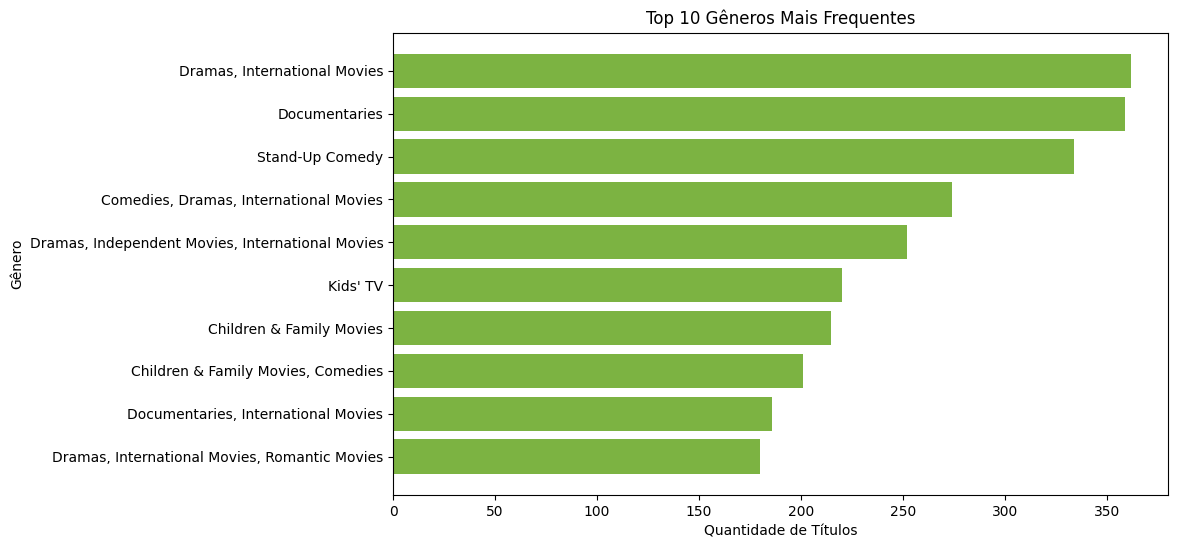

In [19]:
# Contagem por gênero
top_generos = df_filtrado['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_generos.index[::-1], top_generos.values[::-1], color='#7cb342')
plt.title("Top 10 Gêneros Mais Frequentes")
plt.xlabel("Quantidade de Títulos")
plt.ylabel("Gênero")
plt.show()


In [20]:
# Preenchendo valores ausentes na coluna 'listed_in' com uma string vazia
df['listed_in'] = df['listed_in'].fillna('')

# Criando uma lista para armazenar os gêneros individuais de cada título
generos_list = []

# Iterando sobre cada linha do DataFrame
for index, row in df.iterrows():
    tipos = row['type']
    generos_str = row['listed_in']
    
    # Separando a string de gêneros por ', '
    generos = generos_str.split(', ')
    
    # Para cada gênero na lista, crie um novo registro
    for genero in generos:
        # Se o gênero não for uma string vazia, adicione-o à lista
        if genero != '':
            generos_list.append({'type': tipos, 'listed_in': genero})

# Criando um novo DataFrame com os dados desdobrados
df_generos_limpo = pd.DataFrame(generos_list)

df_generos_limpo.head()

,type,listed_in
0,Movie,Documentaries
1,TV Show,International TV Shows
2,TV Show,TV Dramas
3,TV Show,TV Mysteries
4,TV Show,Crime TV Shows


In [22]:
# Contando a frequência de cada gênero para filmes e séries
contagem_generos_por_tipo = df_generos_limpo.groupby(['type', 'listed_in']).size().reset_index(name='count')

# Reorganizando o DataFrame para facilitar a visualização
pivot_generos = contagem_generos_por_tipo.pivot(index='listed_in', columns='type', values='count').fillna(0)

# Calculando a frequência total de cada gênero para ordenar
pivot_generos['Total'] = pivot_generos['Movie'] + pivot_generos['TV Show']
pivot_generos = pivot_generos.sort_values(by='Total', ascending=False)

# Visualizando os 10 gêneros mais comuns
print("Top 10 Gêneros:")
print(pivot_generos[['Movie', 'TV Show']].head(10))

Top 10 Gêneros:
type                       Movie  TV Show
listed_in                                
International Movies      2752.0      0.0
Dramas                    2427.0      0.0
Comedies                  1674.0      0.0
International TV Shows       0.0   1351.0
Documentaries              869.0      0.0
Action & Adventure         859.0      0.0
TV Dramas                    0.0    763.0
Independent Movies         756.0      0.0
Children & Family Movies   641.0      0.0
Romantic Movies            616.0      0.0


In [23]:
# DataFrame apenas para Filmes
df_movies = df_generos_limpo[df_generos_limpo['type'] == 'Movie']

# DataFrame apenas para Séries de TV
df_tv_shows = df_generos_limpo[df_generos_limpo['type'] == 'TV Show']

In [24]:
# Contagem e Top 10 para Filmes
top10_movies = df_movies['listed_in'].value_counts().head(10)
print("Top 10 Gêneros de Filmes:\n")
print(top10_movies)

# Contagem e Top 10 para Séries de TV
top10_tv_shows = df_tv_shows['listed_in'].value_counts().head(10)
print("\nTop 10 Gêneros de Séries de TV:\n")
print(top10_tv_shows)

Top 10 Gêneros de Filmes:

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64

Top 10 Gêneros de Séries de TV:

listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: count, dtype: int64


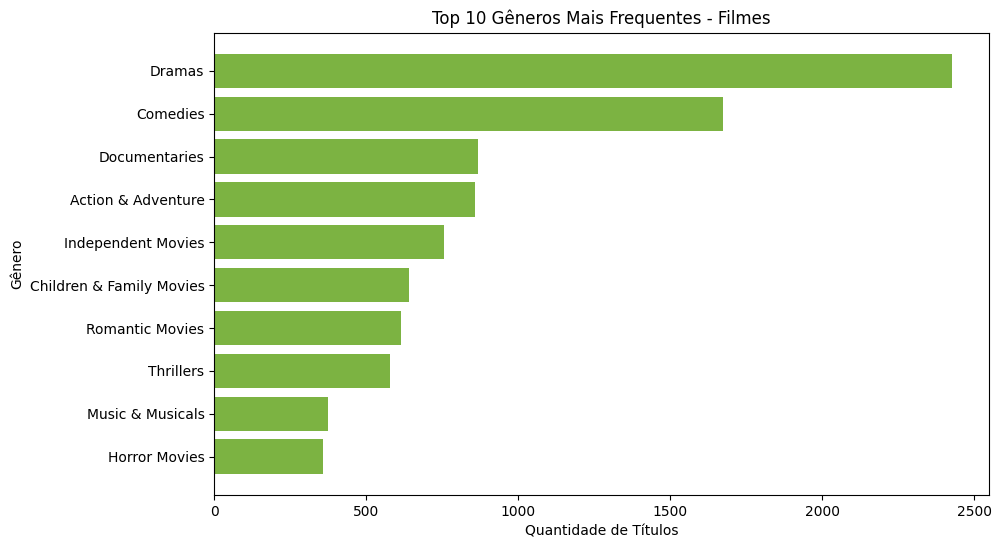

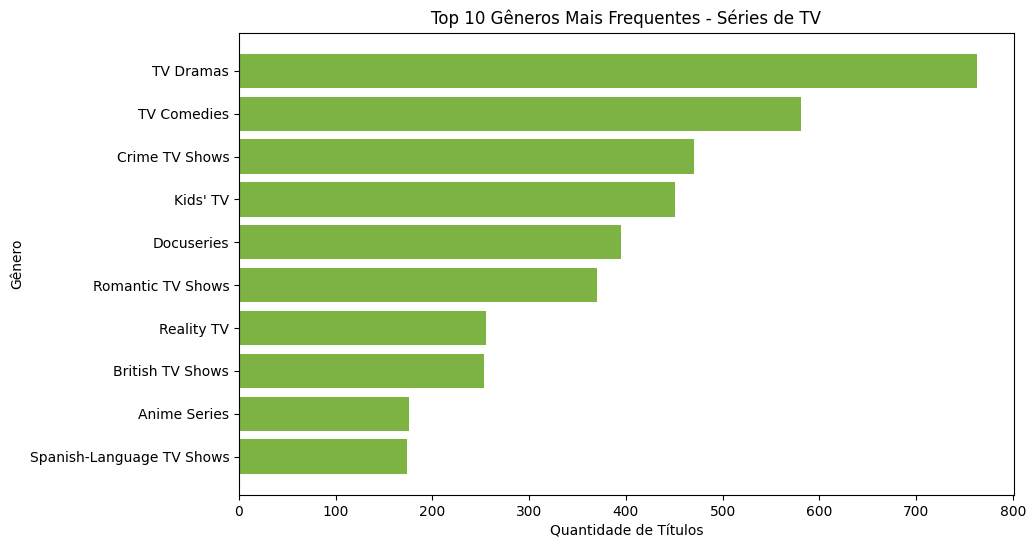

In [28]:
# Contagem por gênero
top10_movies_sem_international = df_movies[~df_movies['listed_in'].str.contains('International')]['listed_in'].value_counts().head(10)
top10_tv_shows_sem_international = df_tv_shows[~df_tv_shows['listed_in'].str.contains('International')]['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top10_movies_sem_international.index[::-1], top10_movies_sem_international.values[::-1], color='#7cb342')
plt.title("Top 10 Gêneros Mais Frequentes - Filmes")
plt.xlabel("Quantidade de Títulos")
plt.ylabel("Gênero")
plt.show()

plt.figure(figsize=(10,6))
plt.barh(top10_tv_shows_sem_international.index[::-1], top10_tv_shows_sem_international.values[::-1], color='#7cb342')
plt.title("Top 10 Gêneros Mais Frequentes - Séries de TV")
plt.xlabel("Quantidade de Títulos")
plt.ylabel("Gênero")
plt.show()